In [4]:
# Langkah 1: Import library yang diperlukan
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Mengatasi masalah deteksi inti CPU
os.environ["LOKY_MAX_CPU_COUNT"] = "1"


In [5]:
# Langkah 2: Load dataset
# Pastikan Anda mengganti 'Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv' dengan nama file yang sesuai.
data = pd.read_csv('Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv')

# Tampilkan beberapa baris awal dataset untuk memastikan data ter-load dengan benar
print(data.head())


   Object_ID                   Provinsi                 Tanggal  \
0        1.0                       Aceh  2020/03/02 00:00:00+00   
1        2.0                       Bali  2020/03/02 00:00:00+00   
2        3.0                     Banten  2020/03/02 00:00:00+00   
3        4.0  Kepulauan Bangka Belitung  2020/03/02 00:00:00+00   
4        5.0                   Bengkulu  2020/03/02 00:00:00+00   

   Kasus_Terkonfirmasi_Akumulatif  Penambahan_Harian_Kasus_Terkonf  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   Kasus_Sembuh_Akumulatif  Penambahan_Harian_Kasus_Sembuh  \
0                      0.0                             0.0   
1                      0.0                          

In [6]:
# Langkah 3: Pilih fitur numerik untuk clustering
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Kolom numerik yang digunakan untuk clustering:", numeric_columns)
data_numeric = data[numeric_columns]

# Menangani nilai NaN (missing values) jika ada
data_numeric = data_numeric.dropna()
data = data.loc[data_numeric.index]  # Sinkronkan dataset asli dengan data numerik yang sudah dibersihkan


Kolom numerik yang digunakan untuk clustering: Index(['Object_ID', 'Kasus_Terkonfirmasi_Akumulatif',
       'Penambahan_Harian_Kasus_Terkonf', 'Kasus_Sembuh_Akumulatif',
       'Penambahan_Harian_Kasus_Sembuh', 'Kasus_Meninggal_Akumulatif',
       'Penambahan_Harian_Kasus_Meningg', 'Kasus_Aktif_Akumulatif', 'FID',
       'ObjectId'],
      dtype='object')


In [7]:
# Langkah 4: Normalisasi data numerik
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)


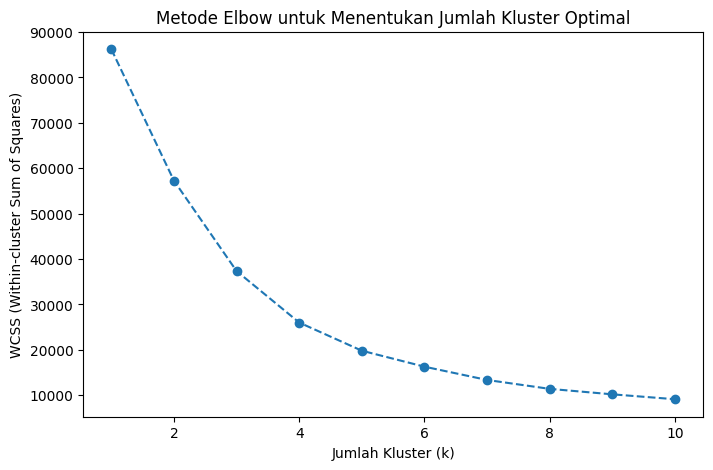

In [8]:
# Langkah 5: Menentukan jumlah kluster menggunakan metode Elbow
wcss = []  # Within-cluster sum of squares
range_k = range(1, 11)  # Uji untuk 1 hingga 10 kluster

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(range_k, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.show()


In [9]:
# Langkah 6: Clustering dengan jumlah kluster optimal
# (Ganti `n_clusters` dengan jumlah kluster yang dipilih dari grafik elbow)
optimal_k = 3  # Contoh, jika jumlah kluster optimal adalah 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_normalized)

# Tambahkan hasil clustering ke dalam dataset asli
data['Cluster'] = clusters


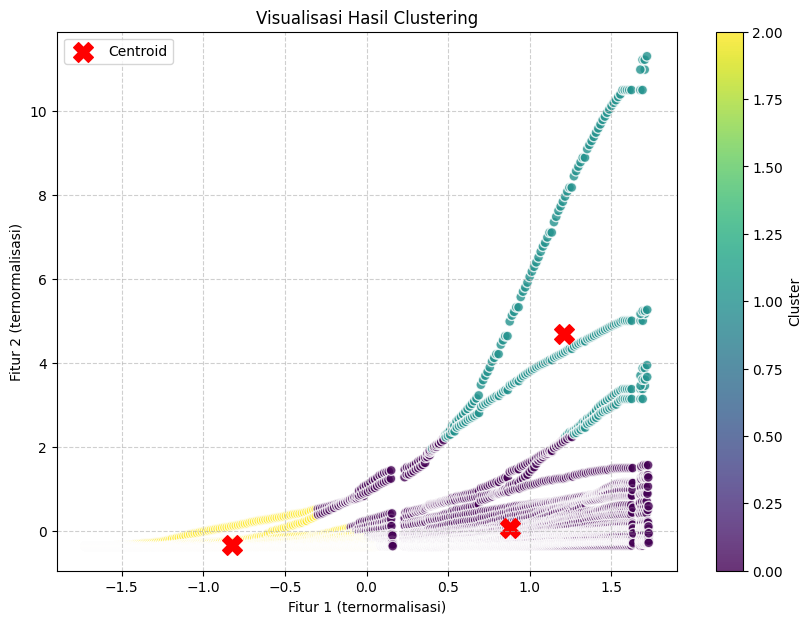

In [10]:
# Langkah 7: Visualisasi hasil clustering (versi lebih rapi)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    data_normalized[:, 0],
    data_normalized[:, 1],
    c=clusters,
    cmap='viridis',
    s=50,
    alpha=0.8,
    edgecolors='w'
)
# Tambahkan centroid
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroid'
)
plt.title('Visualisasi Hasil Clustering')
plt.xlabel('Fitur 1 (ternormalisasi)')
plt.ylabel('Fitur 2 (ternormalisasi)')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [12]:
# Langkah 8: Simpan hasil clustering ke file baru
data['Cluster'] = clusters  # Tambahkan kolom hasil clustering
output_file = 'hasil_clustering.csv'
data.to_csv(output_file, index=False)
print(f"Hasil clustering telah disimpan ke file: {output_file}")


Hasil clustering telah disimpan ke file: hasil_clustering.csv
